In [10]:
from sklearn.datasets import load_iris
from Triplet import *
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim,50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x)) # To check with the loss function
        return x

In [14]:
iris = load_iris()
X = iris['data']
y = iris['target']

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

epochs=100
bs = 16

train = TensorDataset(x_train, y_train)
test  = TensorDataset(x_test, y_test)
train_loader  = DataLoader(train, batch_size=bs)
test_loader   = DataLoader(test, batch_size=bs)


model = Model(4)
    
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

model.train()
for epoch in range(epochs):
    epoch_loss = 0

    
    for x, y in train_loader:

        optimizer.zero_grad()

        y_pred = model(x)
        
        loss = criterion(y_pred, y)
        
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    print("EPOCH:{}/{} Loss: {:.4f}".format(epoch+1, epochs, epoch_loss))

    
correct = 0
total = 0 

model.eval()
for x, y in test_loader:
    
    y_pred = model(x)
    
    
    prediction = torch.argmax(y_pred, 1)
    correct = (prediction == y).sum().item()
    total += bs
print("\n\tAccuracy {:2.2f}%".format( 100*correct/total))

/home/smsm8898/libraries/anaconda3/envs/ms-tcn/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


EPOCH:1/100 Loss: 8.3189
EPOCH:2/100 Loss: 7.2468
EPOCH:3/100 Loss: 6.5195
EPOCH:4/100 Loss: 6.0780
EPOCH:5/100 Loss: 5.8471
EPOCH:6/100 Loss: 5.5913
EPOCH:7/100 Loss: 5.2475
EPOCH:8/100 Loss: 5.0379
EPOCH:9/100 Loss: 4.9578
EPOCH:10/100 Loss: 4.9192
EPOCH:11/100 Loss: 4.8721
EPOCH:12/100 Loss: 4.8152
EPOCH:13/100 Loss: 4.7707
EPOCH:14/100 Loss: 4.7490
EPOCH:15/100 Loss: 4.7404
EPOCH:16/100 Loss: 4.7331
EPOCH:17/100 Loss: 4.7231
EPOCH:18/100 Loss: 4.7129
EPOCH:19/100 Loss: 4.7072
EPOCH:20/100 Loss: 4.7033
EPOCH:21/100 Loss: 4.6977
EPOCH:22/100 Loss: 4.6911
EPOCH:23/100 Loss: 4.6874
EPOCH:24/100 Loss: 4.6849
EPOCH:25/100 Loss: 4.6811
EPOCH:26/100 Loss: 4.6760
EPOCH:27/100 Loss: 4.6728
EPOCH:28/100 Loss: 4.6701
EPOCH:29/100 Loss: 4.6667
EPOCH:30/100 Loss: 4.6634
EPOCH:31/100 Loss: 4.6606
EPOCH:32/100 Loss: 4.6580
EPOCH:33/100 Loss: 4.6553
EPOCH:34/100 Loss: 4.6527
EPOCH:35/100 Loss: 4.6503
EPOCH:36/100 Loss: 4.6480
EPOCH:37/100 Loss: 4.6457
EPOCH:38/100 Loss: 4.6434
EPOCH:39/100 Loss: 4.

[EPOCH: 100/1] Loss 25.6011
[EPOCH: 100/2] Loss 14.5417
[EPOCH: 100/3] Loss 13.3999
[EPOCH: 100/4] Loss 8.0402
[EPOCH: 100/5] Loss 8.5018
[EPOCH: 100/6] Loss 2.9998
[EPOCH: 100/7] Loss 5.3470
[EPOCH: 100/8] Loss 6.2477
[EPOCH: 100/9] Loss 4.0649
[EPOCH: 100/10] Loss 4.1105
[EPOCH: 100/11] Loss 5.3379
[EPOCH: 100/12] Loss 2.0782
[EPOCH: 100/13] Loss 5.0584
[EPOCH: 100/14] Loss 5.0191
[EPOCH: 100/15] Loss 4.7085
[EPOCH: 100/16] Loss 4.5394
[EPOCH: 100/17] Loss 3.0527
[EPOCH: 100/18] Loss 2.2915
[EPOCH: 100/19] Loss 2.4528
[EPOCH: 100/20] Loss 3.9777
[EPOCH: 100/21] Loss 1.8400
[EPOCH: 100/22] Loss 2.6339
[EPOCH: 100/23] Loss 2.5537
[EPOCH: 100/24] Loss 1.0581
[EPOCH: 100/25] Loss 2.9219
[EPOCH: 100/26] Loss 1.5342
[EPOCH: 100/27] Loss 4.4371
[EPOCH: 100/28] Loss 1.9104
[EPOCH: 100/29] Loss 4.2450
[EPOCH: 100/30] Loss 1.7688
[EPOCH: 100/31] Loss 2.7148
[EPOCH: 100/32] Loss 1.9526
[EPOCH: 100/33] Loss 6.2820
[EPOCH: 100/34] Loss 2.2940
[EPOCH: 100/35] Loss 4.4902
[EPOCH: 100/36] Loss 2.691

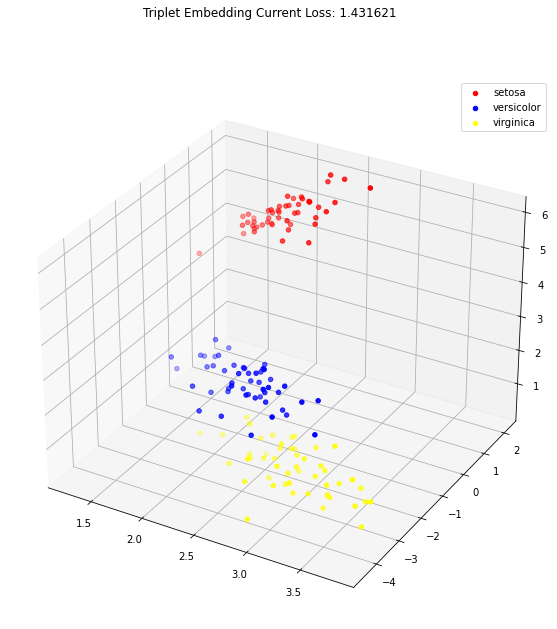

/home/smsm8898/libraries/anaconda3/envs/ms-tcn/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


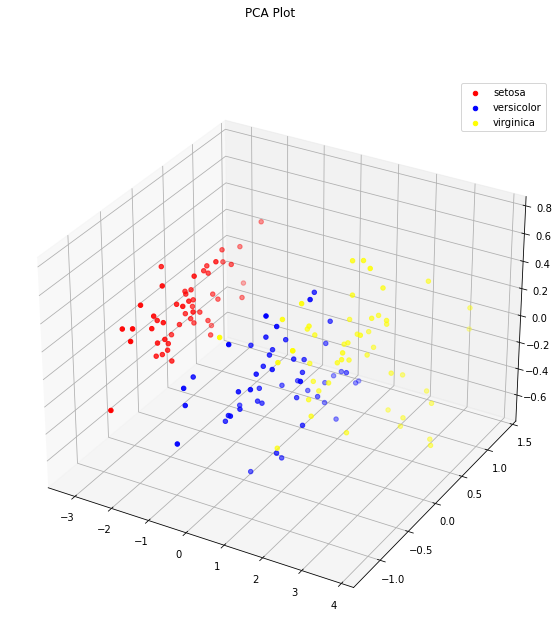

In [15]:
epochs = 100
iris = load_iris()
X = iris['data']
y = iris['target']
triplet_dataset = TripletDataset(X, y)
triplet_loader = DataLoader(triplet_dataset, batch_size = 1)

embedding_net = EmbeddingNet(4, 3)
triplet_model = TripletNet(embedding_net)



margin = 1
optimizer = optim.Adam(triplet_model.parameters(),lr=0.001)
triplet_loss = TripletLoss(margin)


for epoch in range(epochs):
    epoch_loss = 0
    
    for i, (a, p, n, label) in enumerate(triplet_loader):
        
        data = (
            a.squeeze().float(),
            p.squeeze().float(),
            n.squeeze().float()
        )
        
        optimizer.zero_grad()

        outputs = triplet_model(*data)
        
        loss = triplet_loss(*outputs)
        epoch_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    
    print("[EPOCH: {}/{}] Loss {:.4f}".format(epochs, epoch+1, epoch_loss))
triplet_model.plot_embedding(X, epoch_loss)


from sklearn.decomposition import PCA
pca = PCA(3)
embeddings = pca.fit_transform(X)
fig = plt.figure(figsize=(10,10))
fig.suptitle("PCA Plot")
ax  = fig.add_subplot(projection='3d')

x = torch.tensor(x, dtype=torch.float32)

ax.scatter(
    embeddings[50*0:50*1,0],
    embeddings[50*0:50*1,1],
    embeddings[50*0:50*1,2],
    color='red',
    label='setosa'
)
ax.scatter(
    embeddings[50*1:50*2,0],
    embeddings[50*1:50*2,1],
    embeddings[50*1:50*2,2],
    color='blue',
    label='versicolor'
)
ax.scatter(
    embeddings[50*2:50*3,0],
    embeddings[50*2:50*3,1],
    embeddings[50*2:50*3,2],
    color='yellow',
    label='virginica'
)
ax.legend()
plt.show()
plt.close()

In [16]:
X = iris['data']
y = iris['target']
x = torch.tensor(X, dtype=torch.float32)

embeddings = triplet_model.get_embedding(x).detach().numpy()
X = embeddings
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

epochs=100
bs = 16

train = TensorDataset(x_train, y_train)
test  = TensorDataset(x_test, y_test)
train_loader  = DataLoader(train, batch_size=bs)
test_loader   = DataLoader(test, batch_size=bs)



model = Model(3)
    
optimizer = optim.Adam(model.parameters(),lr=0.01)
criterion = nn.CrossEntropyLoss()

model.train()
for epoch in range(epochs):
    epoch_loss = 0

    
    for x, y in train_loader:

        optimizer.zero_grad()

        y_pred = model(x)
        
        loss = criterion(y_pred, y)
        
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    print("EPOCH:{}/{} Loss: {:.4f}".format(epoch+1, epochs, epoch_loss))

    
correct = 0
total = 0 

model.eval()
for x, y in test_loader:
    
    y_pred = model(x)
    
    
    prediction = torch.argmax(y_pred, 1)
    correct = (prediction == y).sum().item()
    total += bs
print("\n\tAccuracy {:2.2f}%".format( 100*correct/total))

/home/smsm8898/libraries/anaconda3/envs/ms-tcn/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


EPOCH:1/100 Loss: 7.5302
EPOCH:2/100 Loss: 6.1529
EPOCH:3/100 Loss: 5.4709
EPOCH:4/100 Loss: 4.9389
EPOCH:5/100 Loss: 4.7430
EPOCH:6/100 Loss: 4.7309
EPOCH:7/100 Loss: 4.6784
EPOCH:8/100 Loss: 4.6909
EPOCH:9/100 Loss: 4.6679
EPOCH:10/100 Loss: 4.6793
EPOCH:11/100 Loss: 4.6714
EPOCH:12/100 Loss: 4.6732
EPOCH:13/100 Loss: 4.7207
EPOCH:14/100 Loss: 4.6466
EPOCH:15/100 Loss: 4.8131
EPOCH:16/100 Loss: 4.5919
EPOCH:17/100 Loss: 4.6690
EPOCH:18/100 Loss: 4.7244
EPOCH:19/100 Loss: 4.6119
EPOCH:20/100 Loss: 4.7379
EPOCH:21/100 Loss: 4.6002
EPOCH:22/100 Loss: 4.6724
EPOCH:23/100 Loss: 4.6298
EPOCH:24/100 Loss: 4.6352
EPOCH:25/100 Loss: 4.6711
EPOCH:26/100 Loss: 4.6157
EPOCH:27/100 Loss: 4.6375
EPOCH:28/100 Loss: 4.7912
EPOCH:29/100 Loss: 4.5587
EPOCH:30/100 Loss: 4.6621
EPOCH:31/100 Loss: 4.7972
EPOCH:32/100 Loss: 4.5989
EPOCH:33/100 Loss: 4.6429
EPOCH:34/100 Loss: 4.8250
EPOCH:35/100 Loss: 4.6586
EPOCH:36/100 Loss: 4.6028
EPOCH:37/100 Loss: 4.6996
EPOCH:38/100 Loss: 4.5817
EPOCH:39/100 Loss: 4.